# Pet Adoption Prediction Project

## Authors
[Your Name Here]

## Abstract
This project aims to predict the likelihood of pet adoption based on various features such as pet type, breed, age, health condition, and other characteristics. We analyze a dataset of shelter pets and build machine learning models to identify key factors that influence adoption success. The insights from this analysis can help animal shelters optimize their adoption strategies and improve outcomes for pets in need of homes.1

## 1. Setup

In [9]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings

# Set random seed for reproducibility
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

# Configure display settings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("Setup complete!")

Setup complete!


## 2. Load Data

In [10]:
# Load the dataset
df = pd.read_csv('pet_adoption_data.csv')

print(f"Dataset loaded successfully!")
print(f"Shape: {df.shape}")
print(f"\nFirst few rows:")
df.head()

Dataset loaded successfully!
Shape: (2007, 13)

First few rows:


,PetID,PetType,Breed,AgeMonths,Color,Size,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood
0,500,Bird,Parakeet,131,Orange,Large,5.039768,1,0,27,140,0,0
1,501,Rabbit,Rabbit,73,White,Large,16.086727,0,0,8,235,0,0
2,502,Dog,Golden Retriever,136,Orange,Medium,2.076286,0,0,85,385,0,0
3,503,Bird,Parakeet,97,White,Small,3.339423,0,0,61,217,1,0
4,504,Rabbit,Rabbit,123,Gray,Large,20.498100,0,0,28,14,1,0


In [11]:
# Dataset information
print("Dataset Information:")
print("="*50)
df.info()
print("\n" + "="*50)
print("\nDataset Statistics:")
df.describe()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2007 entries, 0 to 2006
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PetID               2007 non-null   int64  
 1   PetType             2007 non-null   object 
 2   Breed               2007 non-null   object 
 3   AgeMonths           2007 non-null   int64  
 4   Color               2007 non-null   object 
 5   Size                2007 non-null   object 
 6   WeightKg            2007 non-null   float64
 7   Vaccinated          2007 non-null   int64  
 8   HealthCondition     2007 non-null   int64  
 9   TimeInShelterDays   2007 non-null   int64  
 10  AdoptionFee         2007 non-null   int64  
 11  PreviousOwner       2007 non-null   int64  
 12  AdoptionLikelihood  2007 non-null   int64  
dtypes: float64(1), int64(8), object(4)
memory usage: 204.0+ KB


Dataset Statistics:


,PetID,AgeMonths,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood
count,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000
mean,1503.000000,92.279522,15.705776,0.701046,0.196313,43.974091,249.142003,0.301943,0.328351
std,579.515315,52.148363,8.327749,0.457914,0.397307,25.740253,142.887040,0.459215,0.469730
min,500.000000,1.000000,1.018198,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,1001.500000,48.000000,8.730396,0.000000,0.000000,21.000000,127.000000,0.000000,0.000000
50%,1503.000000,94.000000,15.925416,1.000000,0.000000,45.000000,242.000000,0.000000,0.000000
75%,2004.500000,138.000000,22.737180,1.000000,0.000000,66.000000,375.000000,1.000000,1.000000
max,2506.000000,179.000000,29.995628,1.000000,1.000000,89.000000,499.000000,1.000000,1.000000


## 3. Exploratory Data Analysis (EDA)

### 3.1 Data Quality Check

In [12]:
# Check for missing values
print("Missing Values:")
print("="*50)
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Percentage': missing_percentage
})
print(missing_df[missing_df['Missing Count'] > 0])

if missing_df['Missing Count'].sum() == 0:
    print("No missing values found!")

print("\n" + "="*50)
print(f"\nDuplicate Rows: {df.duplicated().sum()}")

Missing Values:
Empty DataFrame
Columns: [Missing Count, Percentage]
Index: []
No missing values found!


Duplicate Rows: 0


### 3.2 Target Variable Analysis

Target Variable (AdoptionLikelihood) Distribution:
AdoptionLikelihood
0    1348
1     659
Name: count, dtype: int64

Percentage Distribution:
AdoptionLikelihood
0    67.164923
1    32.835077
Name: proportion, dtype: float64


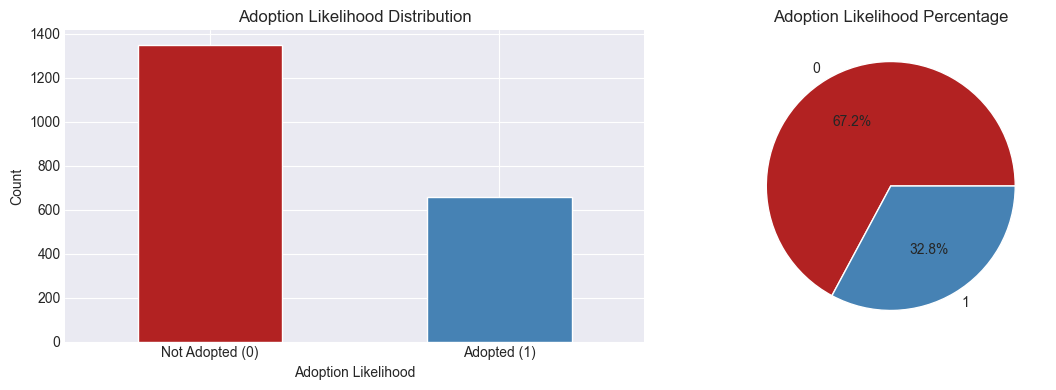

In [17]:
# Target variable distribution
print("Target Variable (AdoptionLikelihood) Distribution:")
print("="*50)
print(df['AdoptionLikelihood'].value_counts())
print("\nPercentage Distribution:")
print(df['AdoptionLikelihood'].value_counts(normalize=True) * 100)

# Visualize target distribution
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

df['AdoptionLikelihood'].value_counts().plot(kind='bar', ax=ax[0], color=['firebrick', 'steelblue'])
ax[0].set_title('Adoption Likelihood Distribution')
ax[0].set_xlabel('Adoption Likelihood')
ax[0].set_ylabel('Count')
ax[0].set_xticklabels(['Not Adopted (0)', 'Adopted (1)'], rotation=0)

df['AdoptionLikelihood'].value_counts().plot(kind='pie', ax=ax[1], autopct='%1.1f%%', colors=['firebrick', 'steelblue'])
ax[1].set_title('Adoption Likelihood Percentage')
ax[1].set_ylabel('')

plt.tight_layout()
plt.show()

### 3.3 Categorical Features Analysis

In [ ]:
# Analyze categorical features
categorical_features = ['PetType', 'Breed', 'Color', 'Size']

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for idx, col in enumerate(categorical_features):
    value_counts = df[col].value_counts()
    value_counts.plot(kind='bar', ax=axes[idx], color='royalblue')
    axes[idx].set_title(f'{col} Distribution')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Count')
    axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Print unique values for each categorical feature
print("\nUnique Values in Categorical Features:")
print("="*50)
for col in categorical_features:
    print(f"\n{col}: {df[col].nunique()} unique values")
    print(df[col].value_counts())

### 3.4 Numerical Features Analysis

In [ ]:
# Analyze numerical features
numerical_features = ['AgeMonths', 'WeightKg', 'TimeInShelterDays', 'AdoptionFee']

# Distribution plots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for idx, col in enumerate(numerical_features):
    axes[idx].hist(df[col], bins=30, color='darkturquoise', edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'{col} Distribution')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')
    axes[idx].axvline(df[col].mean(), color='firebrick', linestyle='--', linewidth=2, label=f'Mean: {df[col].mean():.2f}')
    axes[idx].axvline(df[col].median(), color='darkorange', linestyle='--', linewidth=2, label=f'Median: {df[col].median():.2f}')
    axes[idx].legend()

plt.tight_layout()
plt.show()

# Statistical summary
print("\nNumerical Features Statistics:")
print("="*50)
print(df[numerical_features].describe())

### 3.5 Correlation Analysis

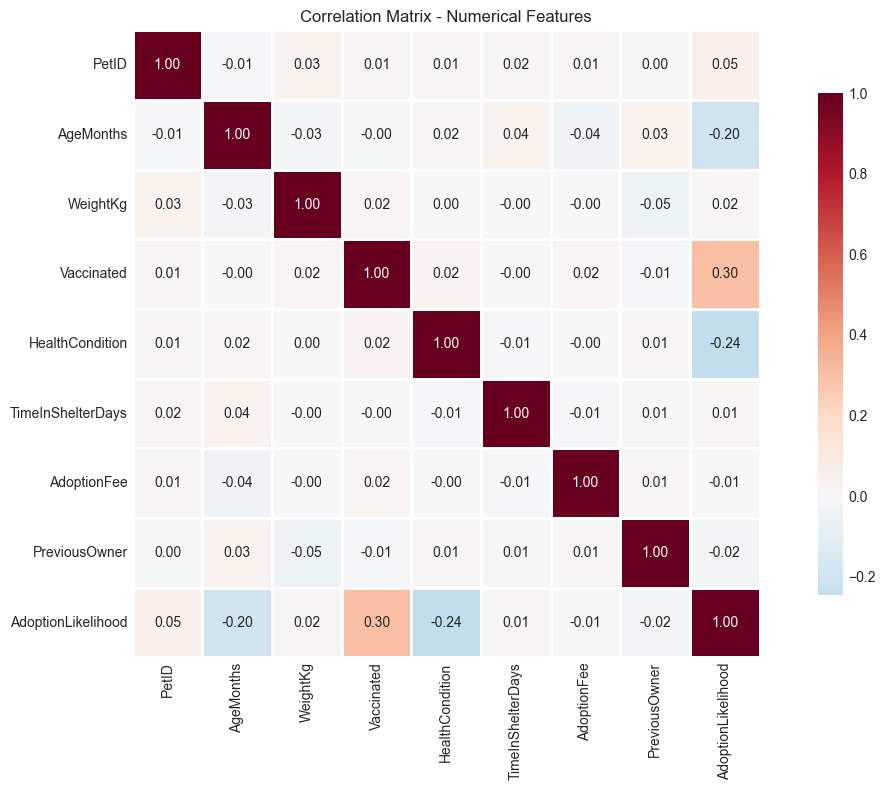


Correlation with Target Variable (AdoptionLikelihood):
AdoptionLikelihood    1.000000
Vaccinated            0.301311
PetID                 0.049582
WeightKg              0.017601
TimeInShelterDays     0.008867
AdoptionFee          -0.005486
PreviousOwner        -0.023065
AgeMonths            -0.202209
HealthCondition      -0.244061
Name: AdoptionLikelihood, dtype: float64


In [24]:
# Correlation matrix for numerical features
numerical_cols = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numerical_cols].corr()

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='RdBu_r', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix - Numerical Features')
plt.tight_layout()
plt.show()

# Correlation with target variable
print("\nCorrelation with Target Variable (AdoptionLikelihood):")
print("="*50)
target_correlation = correlation_matrix['AdoptionLikelihood'].sort_values(ascending=False)
print(target_correlation)

### 3.6 Feature Relationships with Target

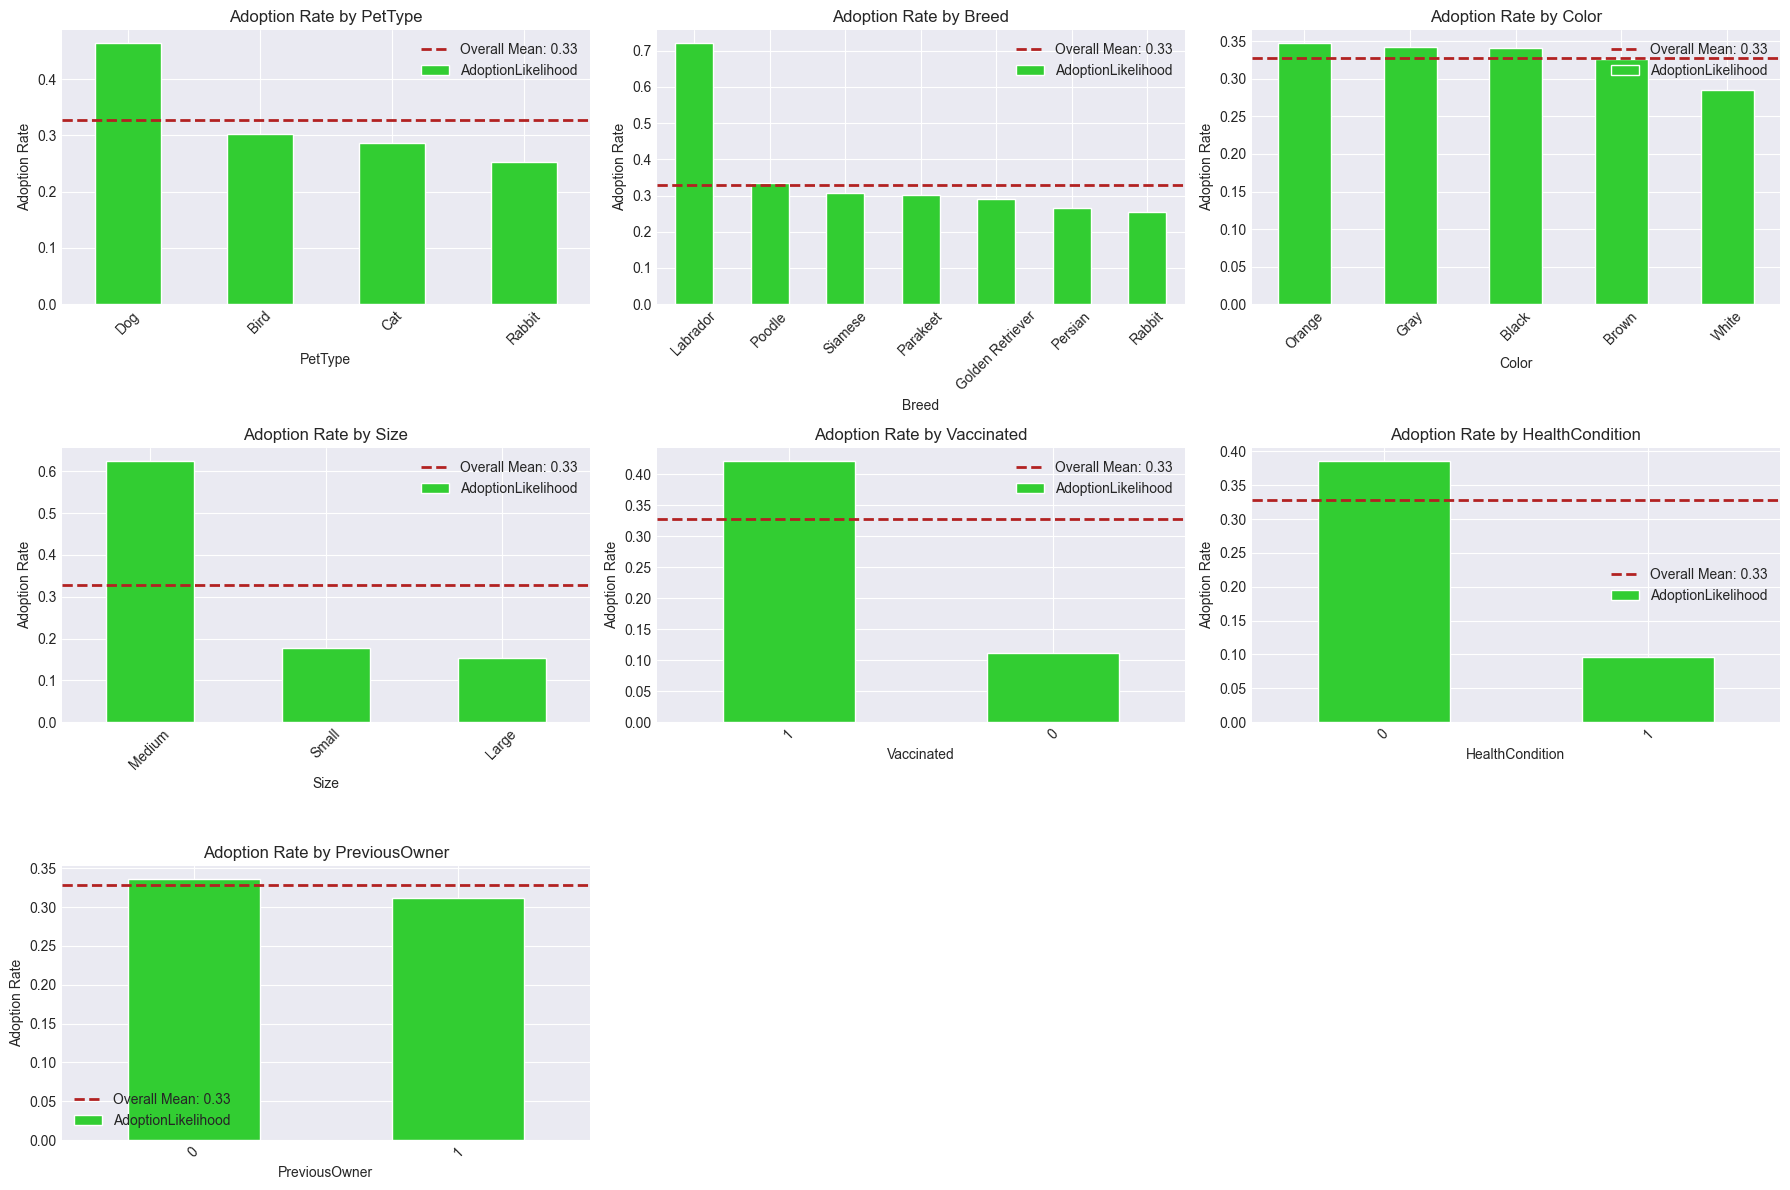

In [25]:
# Analyze relationship between categorical features and target
categorical_features = ['PetType', 'Breed', 'Color', 'Size', 'Vaccinated', 'HealthCondition', 'PreviousOwner']

fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.ravel()

for idx, col in enumerate(categorical_features):
    if idx < len(axes):
        adoption_by_category = df.groupby(col)['AdoptionLikelihood'].mean().sort_values(ascending=False)
        adoption_by_category.plot(kind='bar', ax=axes[idx], color='limegreen')
        axes[idx].set_title(f'Adoption Rate by {col}')
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Adoption Rate')
        axes[idx].tick_params(axis='x', rotation=45)
        axes[idx].axhline(y=df['AdoptionLikelihood'].mean(), color='firebrick', linestyle='--', linewidth=2,
                         label=f'Overall Mean: {df["AdoptionLikelihood"].mean():.2f}')
        axes[idx].legend()

# Remove extra subplots
for idx in range(len(categorical_features), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

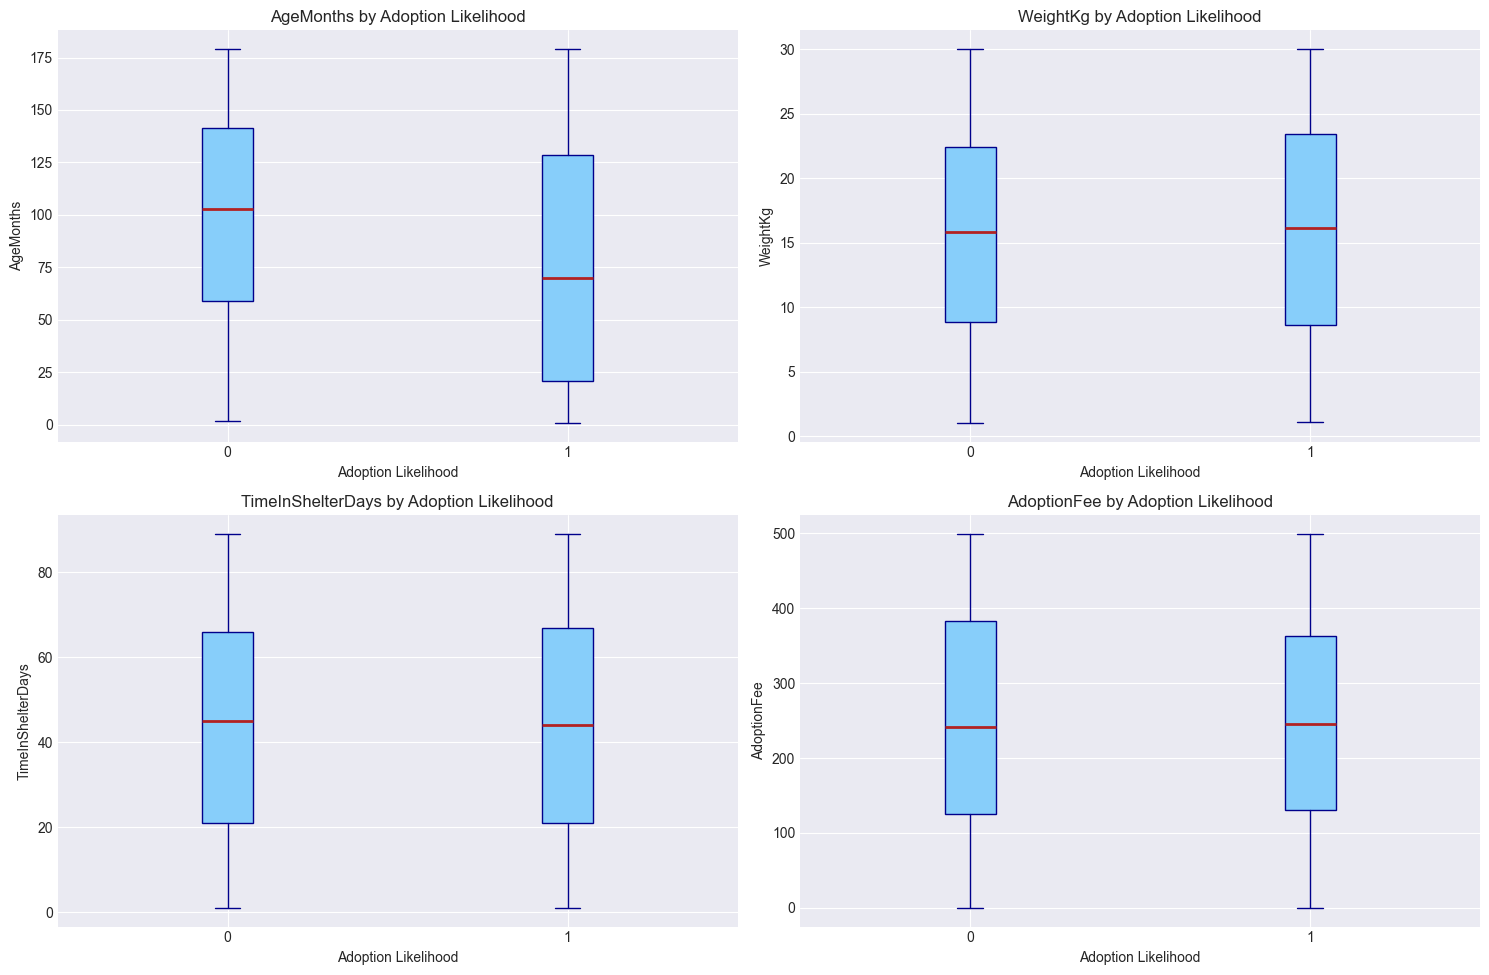

In [26]:
# Box plots for numerical features by adoption likelihood
numerical_features = ['AgeMonths', 'WeightKg', 'TimeInShelterDays', 'AdoptionFee']

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for idx, col in enumerate(numerical_features):
    df.boxplot(column=col, by='AdoptionLikelihood', ax=axes[idx], 
               patch_artist=True,
               boxprops=dict(facecolor='lightskyblue', color='darkblue'),
               medianprops=dict(color='firebrick', linewidth=2),
               whiskerprops=dict(color='darkblue'),
               capprops=dict(color='darkblue'))
    axes[idx].set_title(f'{col} by Adoption Likelihood')
    axes[idx].set_xlabel('Adoption Likelihood')
    axes[idx].set_ylabel(col)

plt.suptitle('')
plt.tight_layout()
plt.show()

## 4. Data Cleaning and Feature Engineering

### 4.1 Handle Missing Values and Duplicates

In [28]:
# Create a copy for cleaning
df_clean = df.copy()

print("Initial dataset shape:", df_clean.shape)

# Handle duplicates
duplicates = df_clean.duplicated().sum()
if duplicates > 0:
    print(f"Removing {duplicates} duplicate rows...")
    df_clean = df_clean.drop_duplicates()
else:
    print("No duplicates found.")

# Handle missing values
missing = df_clean.isnull().sum().sum()
if missing > 0:
    print(f"\nHandling {missing} missing values...")
    # Strategy: fill numerical with median, categorical with mode
    for col in df_clean.columns:
        if df_clean[col].isnull().sum() > 0:
            if df_clean[col].dtype == 'object':
                df_clean[col].fillna(df_clean[col].mode()[0], inplace=True)
            else:
                df_clean[col].fillna(df_clean[col].median(), inplace=True)
else:
    print("No missing values found.")

print("\nCleaned dataset shape:", df_clean.shape)
print("Missing values after cleaning:", df_clean.isnull().sum().sum())

Initial dataset shape: (2007, 13)
No duplicates found.
No missing values found.

Cleaned dataset shape: (2007, 13)
Missing values after cleaning: 0


### 4.2 Handle Outliers

In [29]:
# Detect and handle outliers using IQR method
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

numerical_features = ['AgeMonths', 'WeightKg', 'TimeInShelterDays', 'AdoptionFee']

print("Outlier Detection Summary:")
print("="*50)
for col in numerical_features:
    outliers, lower, upper = detect_outliers_iqr(df_clean, col)
    print(f"\n{col}:")
    print(f"  Outliers found: {len(outliers)}")
    print(f"  Lower bound: {lower:.2f}, Upper bound: {upper:.2f}")
    
# For now, we'll keep outliers but note them
# In production, you might want to cap or remove them based on domain knowledge
print("\n\nNote: Outliers are kept in the dataset for now.")
print("Consider capping or removing them based on domain expertise.")

Outlier Detection Summary:

AgeMonths:
  Outliers found: 0
  Lower bound: -87.00, Upper bound: 273.00

WeightKg:
  Outliers found: 0
  Lower bound: -12.28, Upper bound: 43.75

TimeInShelterDays:
  Outliers found: 0
  Lower bound: -46.50, Upper bound: 133.50

AdoptionFee:
  Outliers found: 0
  Lower bound: -245.00, Upper bound: 747.00


Note: Outliers are kept in the dataset for now.
Consider capping or removing them based on domain expertise.


### 4.3 Feature Engineering

In [30]:
# Create new features
# Check if df_clean exists, if not create it from df
if 'df_clean' not in dir():
    df_clean = df.copy()
    print("Note: df_clean created from df (cleaning steps not run)")

df_engineered = df_clean.copy()

# 1. Age categories
def categorize_age(age):
    if age < 12:
        return 'Young'
    elif age < 60:
        return 'Adult'
    else:
        return 'Senior'

df_engineered['AgeCategory'] = df_engineered['AgeMonths'].apply(categorize_age)

# 2. Weight categories based on size
df_engineered['WeightPerSize'] = df_engineered['WeightKg'] / df_engineered['Size'].map({'Small': 1, 'Medium': 2, 'Large': 3})

# 3. Shelter time categories
def categorize_shelter_time(days):
    if days < 30:
        return 'Short'
    elif days < 90:
        return 'Medium'
    else:
        return 'Long'

df_engineered['ShelterTimeCategory'] = df_engineered['TimeInShelterDays'].apply(categorize_shelter_time)

# 4. Fee range categories
df_engineered['FeeRange'] = pd.cut(df_engineered['AdoptionFee'], bins=3, labels=['Low', 'Medium', 'High'])

# 5. Health score (combination of vaccination and health condition)
df_engineered['HealthScore'] = df_engineered['Vaccinated'] + df_engineered['HealthCondition']

# 6. Age in years
df_engineered['AgeYears'] = df_engineered['AgeMonths'] / 12

print("New Features Created:")
print("="*50)
print("1. AgeCategory - Categorical age groups")
print("2. WeightPerSize - Weight normalized by size")
print("3. ShelterTimeCategory - Time in shelter categories")
print("4. FeeRange - Adoption fee ranges")
print("5. HealthScore - Combined health indicator")
print("6. AgeYears - Age in years")

print(f"\nNew dataset shape: {df_engineered.shape}")
print(f"\nSample of engineered features:")
df_engineered[['AgeMonths', 'AgeCategory', 'AgeYears', 'WeightKg', 'WeightPerSize', 
               'TimeInShelterDays', 'ShelterTimeCategory', 'HealthScore']].head()

New Features Created:
1. AgeCategory - Categorical age groups
2. WeightPerSize - Weight normalized by size
3. ShelterTimeCategory - Time in shelter categories
4. FeeRange - Adoption fee ranges
5. HealthScore - Combined health indicator
6. AgeYears - Age in years

New dataset shape: (2007, 19)

Sample of engineered features:


,AgeMonths,AgeCategory,AgeYears,WeightKg,WeightPerSize,TimeInShelterDays,ShelterTimeCategory,HealthScore
0,131,Senior,10.916667,5.039768,1.679923,27,Short,1
1,73,Senior,6.083333,16.086727,5.362242,8,Short,0
2,136,Senior,11.333333,2.076286,1.038143,85,Medium,0
3,97,Senior,8.083333,3.339423,3.339423,61,Medium,0
4,123,Senior,10.250000,20.498100,6.832700,28,Short,0


### 4.4 Encode Categorical Variables

In [31]:
# Encode categorical variables
# Check if df_engineered exists, if not create it from df_clean or df
if 'df_engineered' not in dir():
    if 'df_clean' in dir():
        print("Warning: df_engineered not found. Run the Feature Engineering cell first!")
        print("Creating df_engineered from df_clean without feature engineering...")
        df_engineered = df_clean.copy()
    else:
        print("Warning: Both df_engineered and df_clean not found. Run previous cells first!")
        print("Creating from df...")
        df_engineered = df.copy()

df_encoded = df_engineered.copy()

# One-hot encoding for nominal categorical variables
nominal_features = ['PetType', 'Breed', 'Color', 'Size']

# Add engineered features if they exist
if 'AgeCategory' in df_encoded.columns:
    nominal_features.extend(['AgeCategory', 'ShelterTimeCategory', 'FeeRange'])

# Apply one-hot encoding
df_encoded = pd.get_dummies(df_encoded, columns=nominal_features, prefix=nominal_features, drop_first=True)

print("Encoding Summary:")
print("="*50)
print(f"Original shape: {df_engineered.shape}")
print(f"After encoding shape: {df_encoded.shape}")
print(f"\nNew columns added: {df_encoded.shape[1] - df_engineered.shape[1]}")

print("\nFirst few columns after encoding:")
print(df_encoded.columns.tolist()[:20])

Encoding Summary:
Original shape: (2007, 19)
After encoding shape: (2007, 32)

New columns added: 13

First few columns after encoding:
['PetID', 'AgeMonths', 'WeightKg', 'Vaccinated', 'HealthCondition', 'TimeInShelterDays', 'AdoptionFee', 'PreviousOwner', 'AdoptionLikelihood', 'WeightPerSize', 'HealthScore', 'AgeYears', 'PetType_Cat', 'PetType_Dog', 'PetType_Rabbit', 'Breed_Labrador', 'Breed_Parakeet', 'Breed_Persian', 'Breed_Poodle', 'Breed_Rabbit']


### 4.5 Prepare Final Dataset

In [32]:
# Prepare final dataset for modeling
df_final = df_encoded.copy()

# Drop PetID as it's just an identifier
if 'PetID' in df_final.columns:
    df_final = df_final.drop('PetID', axis=1)

# Separate features and target
X = df_final.drop('AdoptionLikelihood', axis=1)
y = df_final['AdoptionLikelihood']

print("Final Dataset Summary:")
print("="*50)
print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nNumber of features: {X.shape[1]}")
print(f"\nTarget distribution:")
print(y.value_counts())
print(f"\nClass balance: {y.value_counts(normalize=True) * 100}")

print("\n" + "="*50)
print("Data preparation complete!")
print("Dataset is ready for model training.")

Final Dataset Summary:
Features shape: (2007, 30)
Target shape: (2007,)

Number of features: 30

Target distribution:
AdoptionLikelihood
0    1348
1     659
Name: count, dtype: int64

Class balance: AdoptionLikelihood
0    67.164923
1    32.835077
Name: proportion, dtype: float64

Data preparation complete!
Dataset is ready for model training.


### 4.6 Save Processed Data

In [33]:
# Save processed datasets for future use
# Uncomment the lines below to save the processed data

# df_clean.to_csv('pet_adoption_cleaned.csv', index=False)
# df_engineered.to_csv('pet_adoption_engineered.csv', index=False)
# df_final.to_csv('pet_adoption_final.csv', index=False)

print("Processed datasets ready to be saved:")
print("1. df_clean - Cleaned data (duplicates and missing values handled)")
print("2. df_engineered - With engineered features")
print("3. df_final - Fully processed and encoded, ready for modeling")
print("\nUncomment the save commands above to export the data.")

Processed datasets ready to be saved:
1. df_clean - Cleaned data (duplicates and missing values handled)
2. df_engineered - With engineered features
3. df_final - Fully processed and encoded, ready for modeling

Uncomment the save commands above to export the data.
